# **Project Name**    - Global-Terrorism-Dataset 



##### **Project Type**    - Global-Terrorism-Dataset
##### **Contribution**    - Individual
##### **Team Member 1**  - Akash P s


# **Project Summary -**

In this EDA project, I analyzed The Global Terrorisum Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017.The GTD includes systematic data on domestic as well as international terrorist incidents that have ocuurred during this time period and now includes more than 180,000 attacks.  The purpose of this summary is to provide an overview of my findings and insights.The dataset consisted of more than 180,000 rows and 135 columns. I encountered many challenges during the analysis. One of the challenges is to identify which columns are necessary to analysis bacause most them are unnecessary.we didn’t get any thing from it that’s why i selected 19 columns to analysis.To analyze the data, I used so many python libraries such as Numpy,pandas,matpotlib and seaborThrough my analysis, I observed The Terrorist activities  are surged in each years .They used Bombing and explosive method is to attacks
             

# **GitHub Link -**

GitHub :- https://github.com/ItzmeAkash/Global-Terrorism-EDA.git

# **Problem Statement**


1. How many Number of Terrorist Activities in Each year
2. How many Number of attack were there in 1970 & 2017 and also find percentage of the attacks had increased or decreased
3. How many number of casualities corresponding to killed people in each country for each year
4. What kind of Methods terrorist are used to attacks
5. How many total number of Terrorist Attacks over Regions from 1920-2017
6. How many Total Terrorist Attacks in each Region from 1970 to 2017
7. How many Total number of Casualties (Killed +wounded) in each Region
8. What are the Top 10 countries were attacked
9. How many  Total number of  Casualities(Killed +Wounded)in each Country
10. What type of Targets are terrorist manily focused
11. How many Total number of terrorist attack in each country and regions
12. How many  total number of attacks in each country using Globe
13. Which Country suffered the maximum attacks and minimum attacks
14. Which terrorist organizations have carried out their operations in each country.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [82]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

### Dataset Loading

In [83]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Link:https://drive.google.com/file/d/1erJw1y_Jkr0ZtMvuWioze-vZrmn4gAcT/view?usp=sharing

In [84]:
# Load Dataset
path='/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/EDA/Global Terrorism Data.csv'
data=pd.read_csv(path,encoding="ISO-8859-1")

<ipython-input-84-0a6b7384c2a9>:3: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



### Dataset First View

In [85]:
# Dataset First Look
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

### Dataset Rows & Columns count

**To view the shape of the data set**

In [86]:
# Dataset Rows & Columns count

print("There are {} rows and {} columns in the dataset".format(data.shape[0],data.shape[1]))

There are 181691 rows and 135 columns in the dataset


### Dataset Information

In [87]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### Selecting Columns 

**Checking the uniquenes of the columns of the dataset**

In [88]:
column_list = data.columns.nunique()
print("There are total %d columns in the dataset"%column_list)

There are total 135 columns in the dataset


**Renaming the columns we are going to use for our analysis**

In [89]:
#we can seen that all column name are not proper spelling we need to rename it
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

**Selecting only those columns which are actually required**

In [90]:
#Rename it and final dataset column name
data=data[['Year','Month','Day','Country','State','Region','city','latitude','longitude','location','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [91]:
data.head()

Year  Month  Day             Country    State                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude location  \
0  Santo Domingo  18.456792  -69.951164      NaN   
1    Mexico city  19.371887  -99.086624      NaN   
2        Unknown  15.478598  120.599741      NaN   
3         Athens  37.997490   23.762728      NaN   
4        Fukouka  33.580412  130.396361      NaN   

                       AttackType  Killed  Wounded                   Target  \
0                   Assassination     1.0      0.0             Julio Guzman   
1     Hostage Taking (Kidnapping)     0.0      0.0  Nadine Chaval, daughter   
2                   Assassination     1.0      0.0                 Employee   
3               Bombing/Explosion     NaN      NaN             U.S. Embassy   
4  Facility/Infrastructure Attack     NaN      NaN           U.S. Consulate   

  Summary                               Group                  Target_type  \
0     NaN                              MANO-D  Private Citizens & Property   
1     NaN  23rd of September Communist League      Government (Diplomatic)   
2     NaN                             Unknown          Journalists & Media   
3     NaN                             Unknown      Government (Diplomatic)   
4     NaN                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

**Checking the updated shape of the dataset**

In [92]:
data.shape

(181691, 19)

# ***2. Understanding Your Variables***

In [93]:
# Dataset Columns
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'city',
       'latitude', 'longitude', 'location', 'AttackType', 'Killed', 'Wounded',
       'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [94]:
#Dataset Describe
#Getting overall statistics summary of all numerical columns
data.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

### Variables Description.



* 1. `Year`      :  Year of attack 
* 2. `Month`     :  Month of attack 
* 3.  `Day`      : Day of attack happend 
* 4. `Country`   : In which Country got attacked
* 5. `State`     : in which states got attacked
* 6. `Region`     : Region wise  Terriorst attacked
* 7. `city`      :List of cities were attacked
* 8. `latitude`, `longitude`,`location`: Location details were attack happended
* 9. `Attack_Type`: Which kind of attack they used
* 10. `Killed`,`Wounded`: Casualties 
* 11. `Target` : Terriorst Targets
* 12. `Summary` : short Details of how  Attacks is happened
* 13. `Target_Type` : The terrorist type of Targets
* 14. `Weapon_Type` : Weapons are used to attacks
* 15. `Motive`: Motive of attack


`





### Check Unique Values for each variable.

In [95]:
# Check Unique Values for each variable.
column_list = data.columns.nunique()
print("There are total %d columns in the dataset"%column_list)

There are total 19 columns in the dataset


In [96]:
data.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'city',
       'latitude', 'longitude', 'location', 'AttackType', 'Killed', 'Wounded',
       'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [97]:
data.columns.nunique()

19

In [98]:
#checking countries unique values
total_coun=data['Country'].nunique()
print("Total %d countries were noted in the data"%total_coun)

Total 205 countries were noted in the data


In [99]:
#checking Region unique values
print(data['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [100]:
#checking Attack type unique values
print(data['AttackType'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [101]:
#checking Target type  values
print(data['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [102]:
#Check Unique Values for each variable using for loop
pd.Series({i:data[i].unique() for i in data})  #Using a dictionary Comprehension 

Year           [1970, 1971, 1972, 1973, 1974, 1975, 1976, 197...
Month                 [7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]
Day            [2, 0, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, ...
Country        [Dominican Republic, Mexico, Philippines, Gree...
State          [nan, Federal, Tarlac, Attica, Fukouka, Illino...
Region         [Central America & Caribbean, North America, S...
city           [Santo Domingo, Mexico city, Unknown, Athens, ...
latitude       [18.456792, 19.371887, 15.478598, 37.99749, 33...
longitude      [-69.951164, -99.086624, 120.599741, 23.762728...
location       [nan, Edes Substation, Caparra Shopping Center...
AttackType     [Assassination, Hostage Taking (Kidnapping), B...
Killed         [1.0, 0.0, nan, 7.0, 47.0, 2.0, 36.0, 5.0, 3.0...
Wounded        [0.0, nan, 1.0, 2.0, 7.0, 9.0, 17.0, 5.0, 3.0,...
Target         [Julio Guzman, Nadine Chaval, daughter, Employ...
Summary        [nan, 1/1/1970: Unknown African American assai...
Group          [MANO-D, 2

#***3.Data Wrangling***

##***Data Cleaning***

### Missing Values/Null Values

**Checking for null values**

In [103]:
# Missing Values/Null Values Count
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
location       126196
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64


* So here we see that there are some missing values in `State` `City` `latitude` `longitude` `location` `Killed` `Wounded` `Target` `Summary` `Motive`



####**What did you Know about your dataset?**

This data set contains a single file which contain a set of data information about the terrisit attacks on  which countries and there casualties ,Includes information such as


*   Attack dates: `Year`, `Date` , `Months`
*  Attack Destinations: `Country` ,`State` `Region`,`city`
* Attack type and Motive:`motive`,`Target_type`
* Weapons : `Weapon_type`
* Casualties : `Killed`,`Wounded`


The dataset contains total of 181691 rows and 135 columns.In the dataset conatain lots of columns we don't need that much columns so i desided to select 20 columns. In this 20 columns we will get all detatils about the attacks that's why i selected it

In [104]:
#Total number of missing values
data.isnull().sum().sum()

360683

<Axes: >

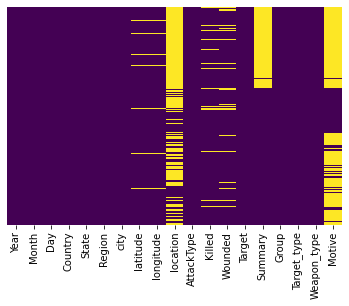

In [105]:
# Visualizing the missing values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##***Data Manipulation***

###Filling Missing values

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   location     55495 non-null   object 
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

In [107]:
#filling the data in killed and wounded columns
data['Killed']=data['Killed'].fillna(0)
data['Wounded']=data['Wounded'].fillna(0)
data['Casualty']=data['Killed']+data['Wounded']

In [108]:
data.shape

(181691, 20)

In [109]:
data.describe()

Year          Month            Day       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          longitude         Killed        Wounded       Casualty  
count  1.771340e+05  181691.000000  181691.000000  181691.000000  
mean  -4.586957e+02       2.266860       2.883296       5.150156  
std    2.047790e+05      11.227057      34.309747      40.555416  
min   -8.618590e+07       0.000000       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000       1.000000  
75%    6.871033e+01       2.000000       2.000000       4.000000  
max    1.793667e+02    1570.000000    8191.000000    9574.000000

**Observation**


1.   The data consists of terrorist activites ranging from the year 1970 to 2017
2.   Maximum number of people killed in an event were:1570
3.   Maximum number of people wounded in an event were : 8191
4.   Maximum number of total cascualties in an event were: 9564

**For columns that have categorical data we will fill it with mode**

In [110]:
for col in data.columns:
  mode=data[col].mode()[0]
  data[col].fillna(mode,inplace=True)

<Axes: >

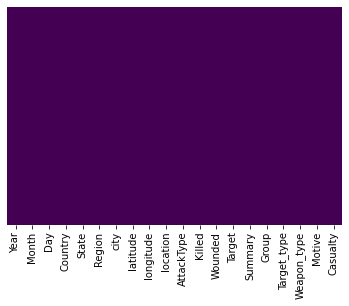

In [111]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [112]:
#checking again is there any nullvalues remaining

data.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
city           0
latitude       0
longitude      0
location       0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
Casualty       0
dtype: int64

###What all manipulations have you done? 


*  Handled and removed the Null values with statistical mode methods
* Using heatmap to identify the How many Null values
* checked the unqine values
* Adding `Killed`,`Wounded` columns to get `Casualties` column




# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Chart 1

**1.How many Number of Terrorist Activities in Each year**

In [113]:
Attacks=data['Year'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'}).set_index('Year')

In [114]:
Attacks.head()

Attacks
Year         
1970      651
1971      471
1972      568
1973      473
1974      581

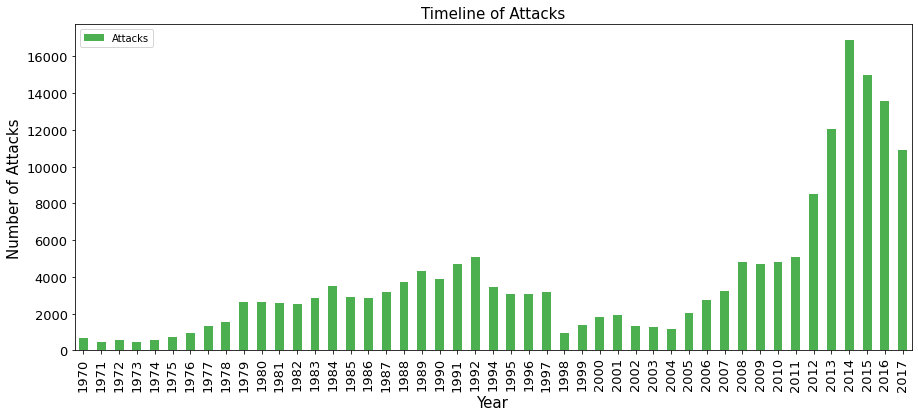

In [115]:
Attacks.plot(kind='bar',color="#4CAF50",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()



*   Most number of attack (16903) in 2014
*   Least number of attack (471) in 1971





###Chart 2

**2.How many Number of attack were there in 1970 & 2017 and also find percentage of the attacks had increased or decreased**

In [116]:
Year=data.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print('There are ',Year[1970],'Attacks happened in 1970 &',Year[2017],'Attacks Happened in 2017')
print('So the number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

There are  651 Attacks happened in 1970 & 10900 Attacks Happened in 2017
So the number of attacks from 1970 has increased by 94.0 % till 2017


###Chart 3

**3.How many number of casualities corresponding to killed people in each country for each year**

In [138]:
px.scatter(data,data.Wounded,data.Killed,hover_name='Country',animation_frame='Year',animation_group='Country',color='AttackType',
           range_color=[0.1],labels={'killed':'Deaths','Wounded':'Casualities'},
           title='Number of causalities vs killed people in each country for each year')

###Chart 4

**4.What kind of Methods terrorist are used to attacks**

In [118]:
attackmethod=data['AttackType'].value_counts()
attackmethod

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

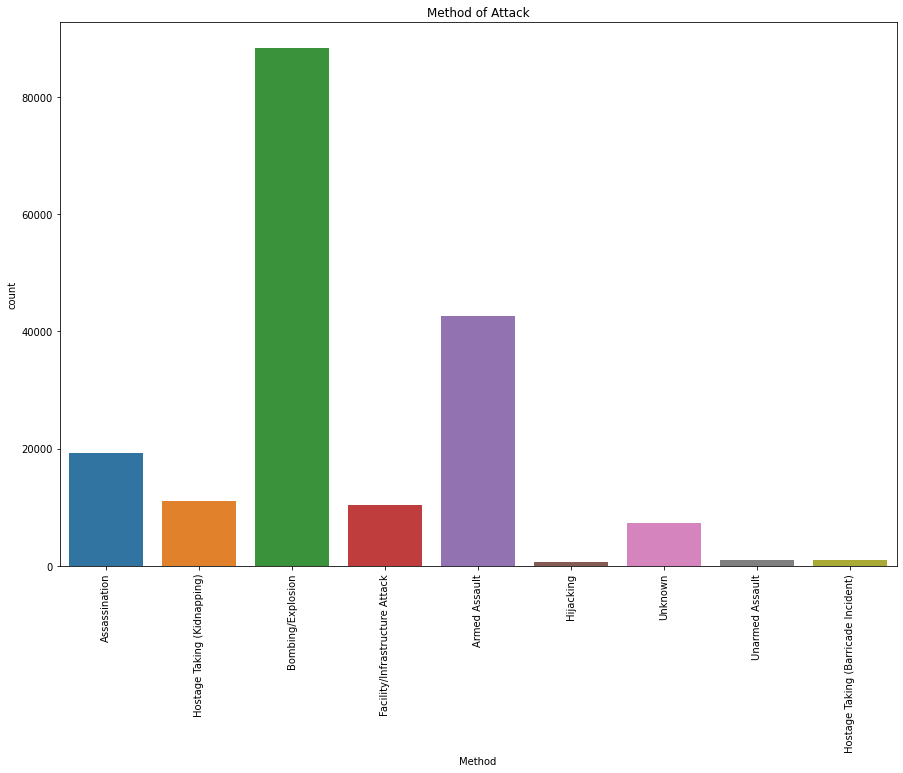

In [119]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['AttackType'])
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

**We can see thatThe Bombing/Explosion attack method are mostly used by terrorist and the least one is Hijacking**





###Chart 5

**5.How many Terrorist Attacks over Regions from 1920-2017**

In [120]:
#Attach_over_Region=Aor
Aor=pd.crosstab(data.Year,data.Region)
Aor.head()

Region  Australasia & Oceania  Central America & Caribbean  Central Asia  \
Year                                                                       
1970                        1                            7             0   
1971                        1                            5             0   
1972                        8                            3             0   
1973                        1                            6             0   
1974                        1                           11             0   

Region  East Asia  Eastern Europe  Middle East & North Africa  North America  \
Year                                                                           
1970            2              12                          28            472   
1971            1               5                          55            247   
1972            0               1                          53             73   
1973            2               1                          19             64   
1974            4               2                          42            111   

Region  South America  South Asia  Southeast Asia  Sub-Saharan Africa  \
Year                                                                    
1970               65           1              10                   3   
1971               24           0               6                   2   
1972               33           1              16                   4   
1973               83           1               2                   4   
1974               81           2               3                   7   

Region  Western Europe  
Year                    
1970                50  
1971               125  
1972               376  
1973               290  
1974               317

Text(0, 0.5, 'Number of Attacks')

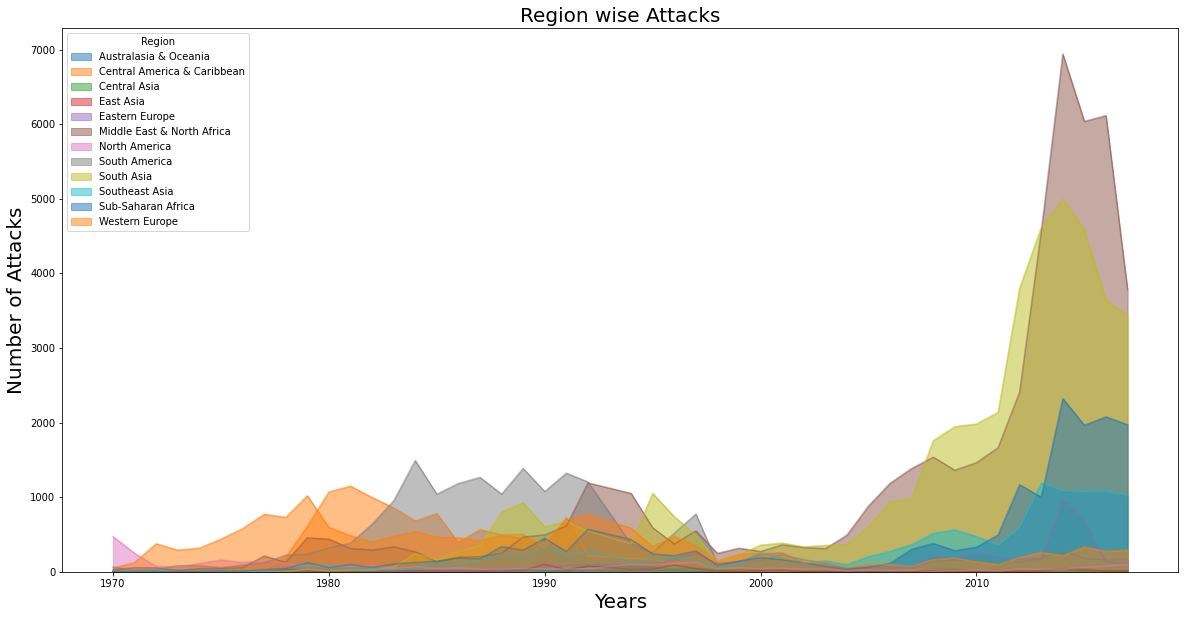

In [121]:
#using areaplot
Aor.plot(kind='area',stacked=False,alpha=0.5,figsize=(20,10))
plt.title("Region wise Attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20) 

###Chart 6

**6.How many Total number of Terrorist Attacks in each Region from 1970 to 2017**

In [122]:
regionattack=Aor.transpose()
regionattack['Total']=regionattack.sum(axis=1)
Total_Attack_on_region=regionattack['Total'].sort_values(ascending=False)
Total_Attack_on_region

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

Text(0, 0.5, 'Number of Attacks')

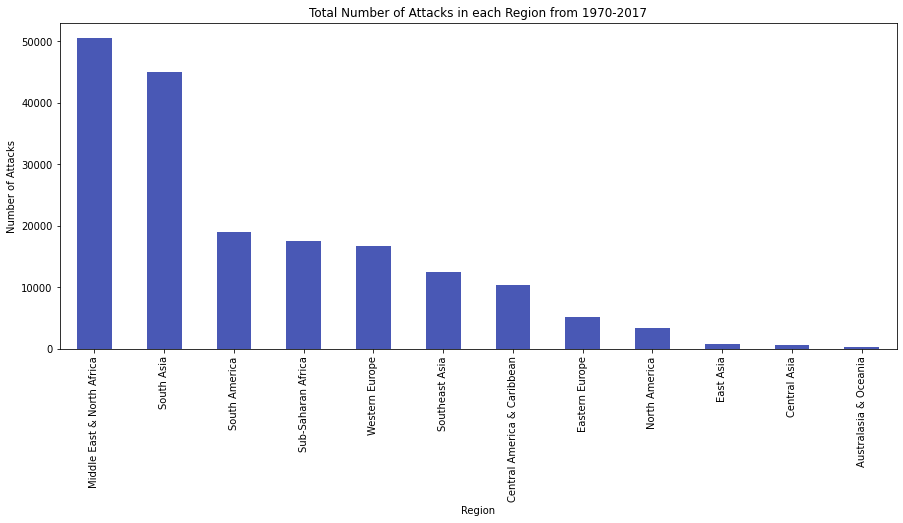

In [123]:
Total_Attack_on_region.plot(kind='bar',color='#4958B5',figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")

**In this chart we can see that most of the terrorist activies in middle east and north africa region and least was Australasia & Oceania region**

###Chart 7

**7. How many total number of Casualties (Killed +wounded) in each Region**

In [124]:
total_casualities_regions=data[['Region','Casualty']].groupby('Region').sum().sort_values(by='Casualty',ascending=False)
total_casualities_regions

Casualty
Region                               
Middle East & North Africa   351950.0
South Asia                   242679.0
Sub-Saharan Africa           131243.0
South America                 45553.0
Southeast Asia                41896.0
Central America & Caribbean   37699.0
North America                 26447.0
Western Europe                25026.0
Eastern Europe                19460.0
East Asia                     10365.0
Central Asia                   3009.0
Australasia & Oceania           410.0

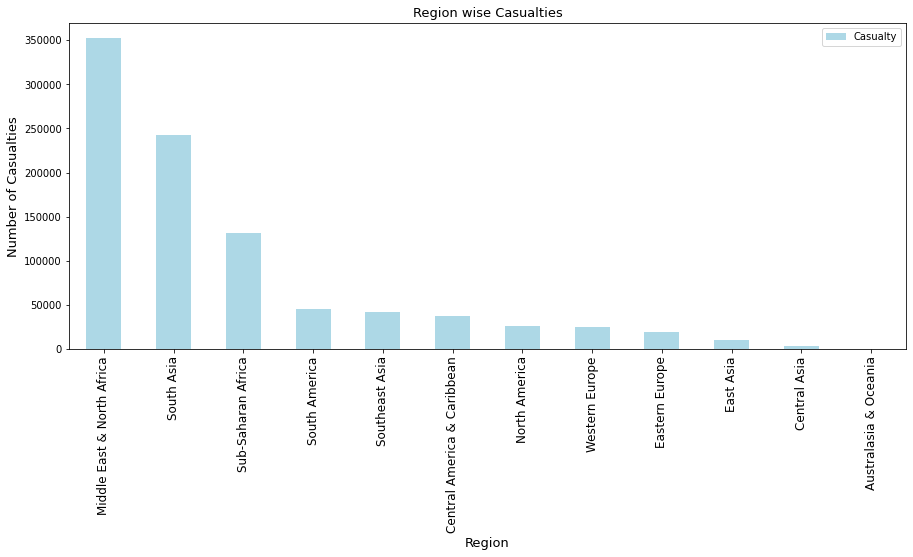

In [125]:
total_casualities_regions.plot(kind='bar',color='lightblue',figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Region",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

###Chart 8

**8.What are the Top 10 countries were attacked**

In [126]:
Attacks_country=data['Country'].value_counts().head(10)
Attacks_country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

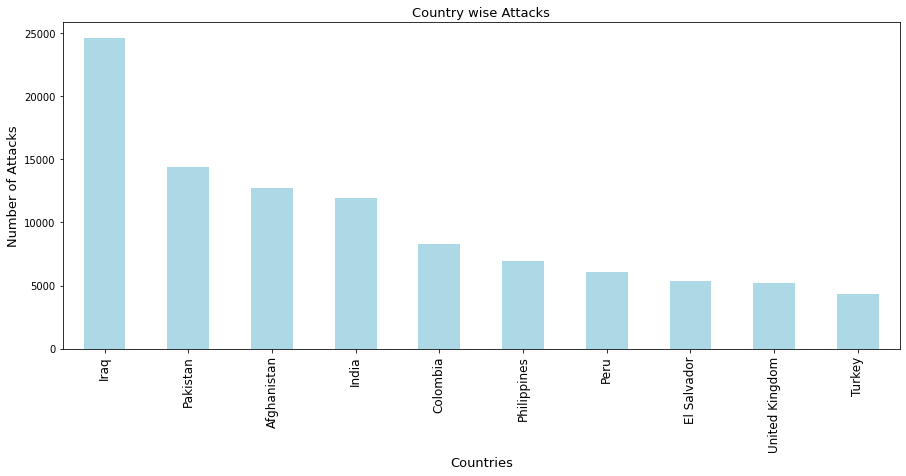

In [127]:
Attacks_country.plot(kind='bar',color='lightblue',figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

###Chart 9

**9.How many  Total number of  Casualities(Killed +Wounded)in each Country**

In [128]:
total_casualities_Country=data[['Country','Casualty']].groupby("Country").sum().sort_values(by='Casualty',ascending=False)
total_casualities_Country.head(10)

Casualty
Country                
Iraq           213279.0
Afghanistan     83661.0
Pakistan        65860.0
India           48321.0
Nigeria         32921.0
Sri Lanka       31091.0
Syria           29338.0
Colombia        25026.0
United States   24473.0
Philippines     22926.0

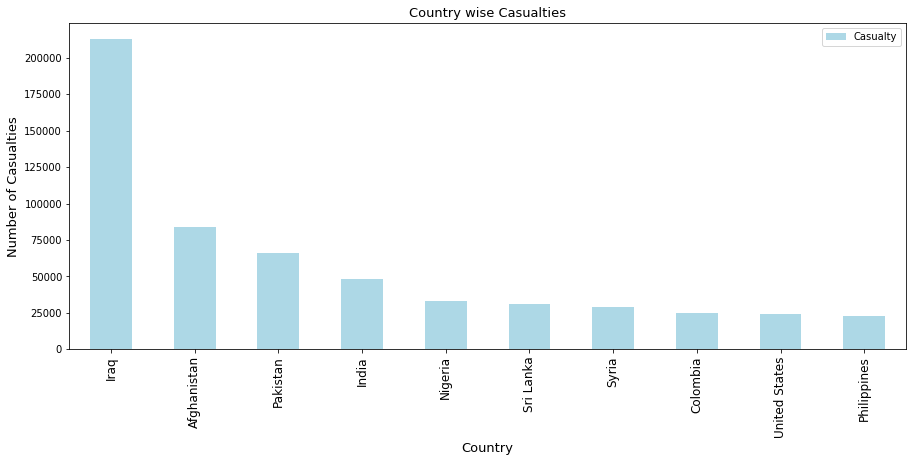

In [129]:
total_casualities_Country[:10].plot(kind='bar',color='lightblue',figsize=(15,6))
plt.title("Country wise Casualties",fontsize=13)
plt.xlabel("Country",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

**Here we can see that Iraq has the upmost casualties and lowest was Philippines**

###Chart 10

**10.What type of Targets are terrorist manily focused**

In [130]:
data['Target_type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

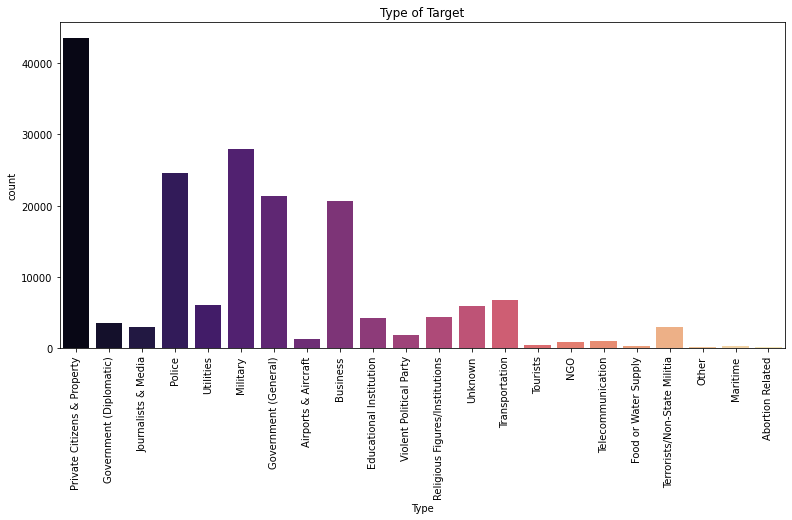

In [131]:
plt.figure(figsize=(13,6))
sns.countplot(x=data['Target_type'],palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

**The terrorist mostly target the Private Citizens & Property and least focused was other type**

###Chart 11

**11.How many Total number of terrorist attack in each country and regions**

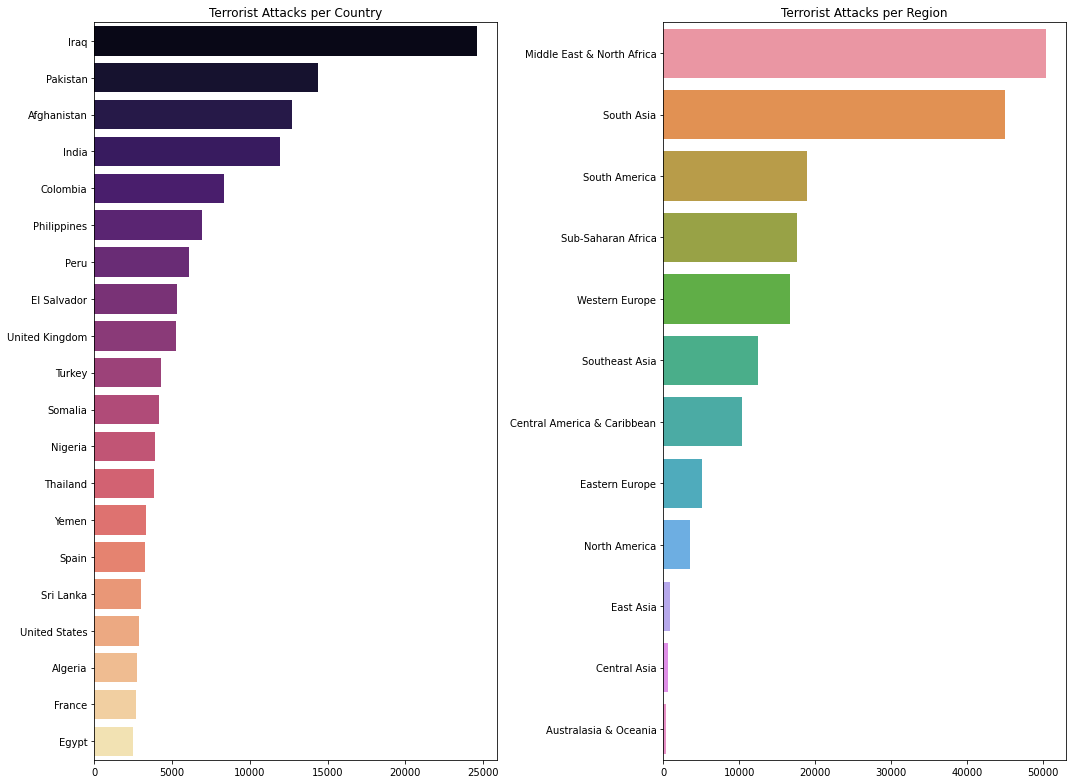

In [132]:
#using barplot
fig,axes=plt.subplots(figsize=(15,11),nrows=1,ncols=2)
sns.barplot(x=data['Country'].value_counts()[:20].values,y=data['Country'].value_counts()[:20].index,
            ax=axes[0],palette='magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=data['Region'].value_counts().values,y=data['Region'].value_counts().index,ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

**We can see that in Country wise Iraq has the number of attacks and in region wise Middle East & North Africa has most highest attacks**

###Chart 12

**12.How many  total number of attacks in each country using Globe**

In [133]:
# We will first create a new dataframe which contains the total count of attacks for each country in order to use it as color bar
terrs=data.groupby(['Country'],as_index=False).count()

In [134]:
fig=px.choropleth(terrs,locations='Country',locationmode='country names',
                   color='Year',hover_name='Country',projection='orthographic',
                   title='Total number of attacks (1970-2017)',labels={'Year':'Attacks'})
fig.show()

###Chart 13

**13.Which Country suffered the maximum attacks and minimum attacks**

In [135]:
max_count=terrs['Year'].max()
max_id=terrs['Year'].idxmax()
max_name=terrs['Country'][max_id]
min_count=terrs['Year'].min()
min_id=terrs['Year'].idxmin()
min_name=terrs['Country'][min_id]

In [136]:
print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the maximum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the maximum number of terror attacks of 1


###Chart 14

**14.Which terrorist organizations have carried out their operations in each country.**

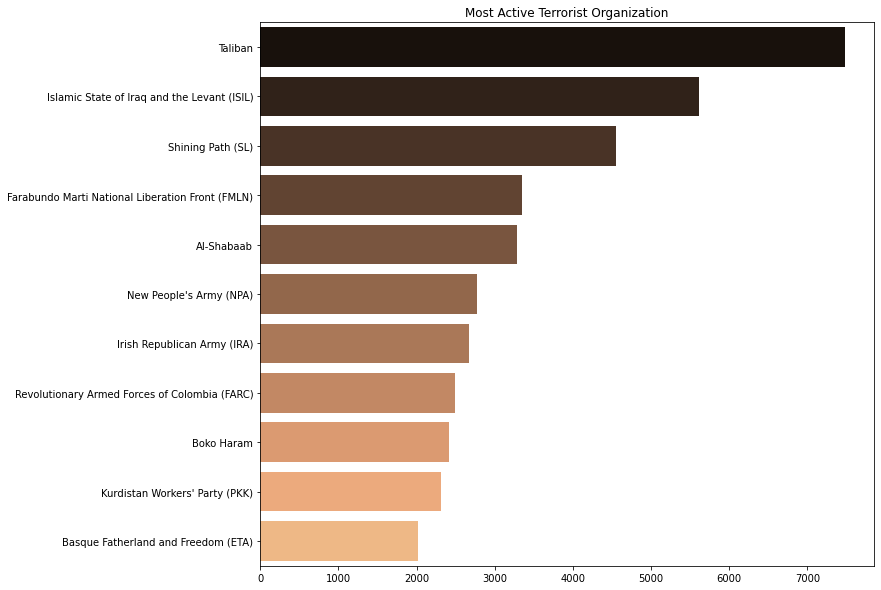

In [137]:
plt.subplots(figsize=(11,10))
sns.barplot(y=data['Group'].value_counts()[1:12].index,x=data['Group'].value_counts()[1:12].values,palette='copper')
plt.title('Most Active Terrorist Organization')
plt.show()

**So here we can see that,most no of operation organized in Tailban**

# **Conclusion**



1. Attacks has increased but number of people killed manier times as attack happened
2.Iraq has the most attacks 
3. The Middle East and North Africa Regions has most taregeted
4. Maximum number of attacks are from Bombing/Explosions
5. There are maximum number of attacks in Private citizens and Property
6. Taliban and ISIL has a most active organisation




<blockquote> Project Done By Akash P s </blockquote>